In [1]:
import pandas as pd
df = pd.read_csv("applestocks regression iml.csv").drop(["date","adj_close"],axis=1)
#swapped location to keep close at the end
df.iloc[:,[3,4]] = df.iloc[:,[4,3]].values
#swapping the title of the columns as the above line only changes the values and not the title
column_names = df.columns.tolist()
column_names[3], column_names[4] = column_names[4], column_names[3]
df.columns = column_names
print(df)

             open        high         low       volume       close
0        0.128348    0.128906    0.128348  469033600.0    0.128348
1        0.122210    0.122210    0.121652  175884800.0    0.121652
2        0.113281    0.113281    0.112723  105728000.0    0.112723
3        0.115513    0.116071    0.115513   86441600.0    0.115513
4        0.118862    0.119420    0.118862   73449600.0    0.118862
...           ...         ...         ...          ...         ...
11134  241.250000  245.550003  240.990005   40896200.0  244.600006
11135  244.149994  245.179993  241.839996   48822500.0  244.470001
11136  244.660004  246.009995  243.160004   32204200.0  244.869995
11137  244.940002  246.779999  244.289993   32316900.0  245.830002
11138  245.949997  248.690002  245.220001   53119400.0  245.550003

[11139 rows x 5 columns]


C:\Users\kisha\AppData\Local\Temp\ipykernel_5692\930990737.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.28347993e-01 1.21652000e-01 1.12723000e-01 ... 2.44869995e+02
 2.45830002e+02 2.45550003e+02]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,[3,4]] = df.iloc[:,[4,3]].values


In [2]:
#day2 after classification for a month
#did changes to data set , not meant for regression but now using to predict closing value
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
import copy
from sklearn.linear_model import LinearRegression

##### 

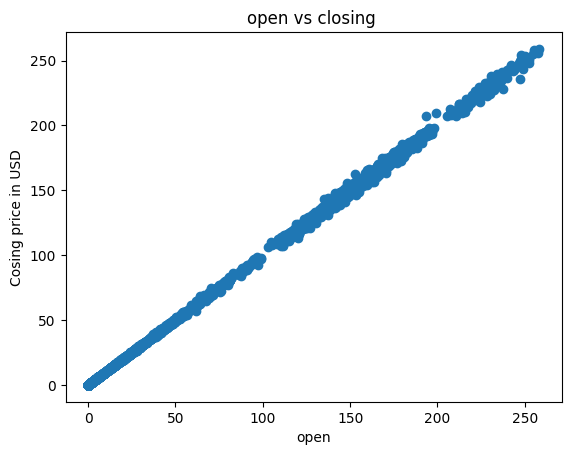

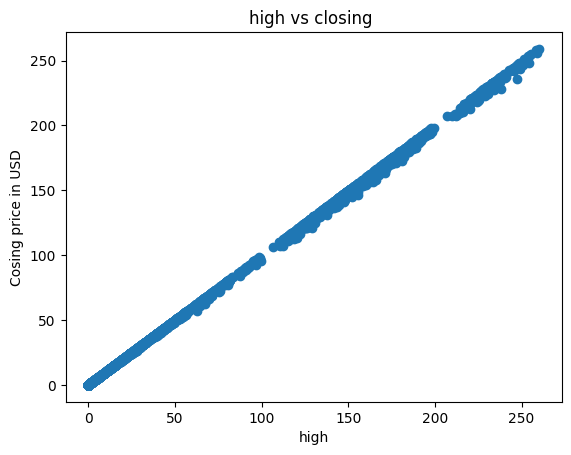

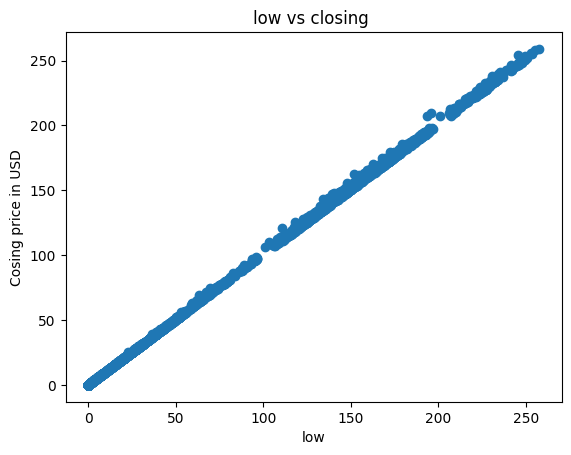

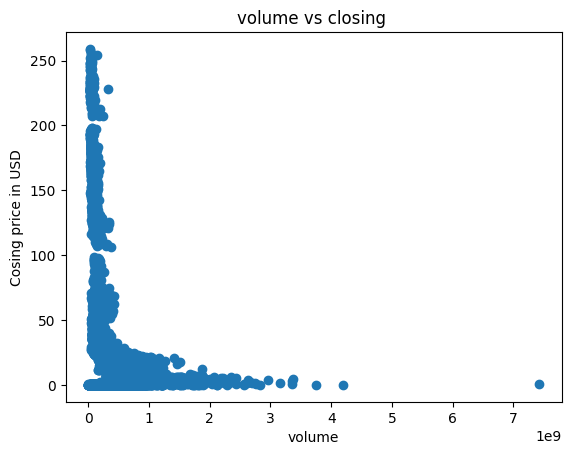

In [3]:
for i in df.columns[:-1]:
    plt.scatter(df[i],df["close"])
    plt.title(f"{i} vs closing ")
    plt.xlabel(i)
    plt.ylabel("Cosing price in USD")
    plt.show()

In [4]:
#day 3 linear regression inbuilt model
s=int(0.8*len(df))
sdf = df.sample(frac=1,random_state = 42).reset_index(drop=True)
train = sdf[:s]
test = sdf[s:]

In [5]:
train

,open,high,low,volume,close
0,1.415714,1.438571,1.386786,1.322465e+09,1.405357
1,0.133929,0.140625,0.133929,2.027872e+08,0.138393
2,18.895000,18.968929,18.730356,3.949400e+08,18.741072
3,61.847500,63.209999,60.652500,2.718572e+08,61.195000
4,43.057499,43.480000,42.924999,8.972640e+07,43.110001
...,...,...,...,...,...
8906,0.315848,0.319196,0.306920,3.725680e+08,0.310826
8907,0.377232,0.386161,0.375000,1.378272e+08,0.377232
8908,28.727501,29.215000,28.712500,1.735820e+08,29.077499
8909,216.070007,219.509995,215.600006,3.802810e+07,217.529999


In [6]:
test

,open,high,low,volume,close
8911,28.937500,29.087500,28.777500,172253600.0,28.982500
8912,6.073929,6.303571,6.059643,891304400.0,6.198571
8913,0.417411,0.426339,0.415179,207200000.0,0.418527
8914,179.490005,180.130005,174.820007,90370200.0,176.300003
8915,0.366071,0.375000,0.366071,112459200.0,0.372768
...,...,...,...,...,...
11134,0.396429,0.408036,0.393750,263155200.0,0.403750
11135,0.411607,0.426964,0.409643,348409600.0,0.420357
11136,0.455179,0.455179,0.445179,375407200.0,0.446071
11137,0.139509,0.147879,0.139509,255001600.0,0.146763


In [7]:
def split_xy(data):
    datax = data.iloc[:,:-1].values
    datay = data.iloc[:,-1]
    datay=datay.astype(int)
    datay = datay.to_numpy().reshape(-1,1)
    return datax,datay
trainx , trainy = split_xy(train)
testx , testy = split_xy(test)
reg = LinearRegression()
reg.fit(trainx,trainy)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
ypred = reg.predict(testx)
print(ypred)
reg.score(testx,testy)

[[28.55867648]
 [ 5.81086447]
 [ 0.08015496]
 ...
 [ 0.08180498]
 [-0.2024907 ]
 [ 6.35489013]]


0.9999258196994604

In [9]:
#dumb dataseet LinearRegession itself came 99.99% correct
#gonna do a casual NN to learn no intent to predict better

In [10]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
def sc(data):
    data = s.fit_transform(data)
    return data
trainx = sc(trainx)
testx = sc(testx)

In [11]:
#day4 NN
'''tempnorm = tf.keras.layers.Normalization(input_shape = (5,1),axis=1)
tempnorm.adapt(trainx)
trainx = pd.DataFrame(trainx)
trainx.head()'''
nn = tf.keras.Sequential([
    #tempnorm,
    #tf.keras.layers.Flatten(input_shape=(4, 4)),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'relu')
                          ])
nn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'mean_squared_error')
h= nn.fit(testx,testy,epochs=5)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2299.8564
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7570 
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3574
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8620
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7549


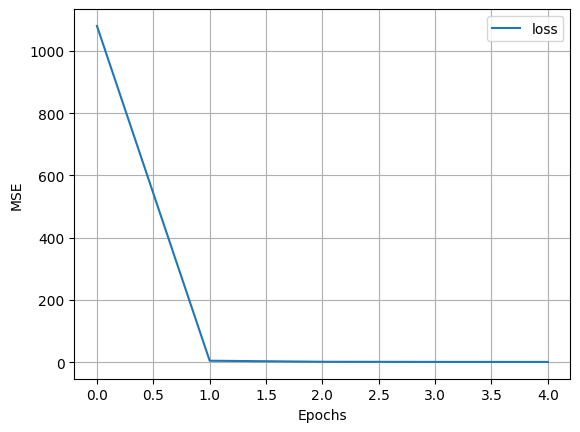

In [12]:
def plot_loss(h):
    plt.plot(h.history['loss'],label='loss')
    #plt.plot(h.history['val_loss'],label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_loss(h)

In [13]:
ypred1 = nn.predict(testx)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [14]:
def root_mean_se(yreal,ypred):
    mse = (np.square(yreal - ypred)).mean()
    return (np.sqrt(mse))
nne = root_mean_se(testy,ypred1)
lre = root_mean_se(testy,ypred)
print("Root mean squared error of NN is ",nne)
print("Root mean squared error of LR is ",lre)

Root mean squared error of NN is  0.6698613669211658
Root mean squared error of LR is  0.4554860813982672


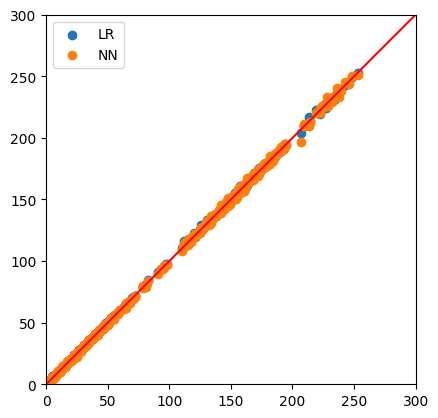

In [15]:
#day5 after 2 days,debug day4 done,took 6 days in reallife to complete was consistent
#Lr better than nn damn!
ax = plt.axes(aspect = "equal")
plt.scatter(testy,ypred,label = "LR")
plt.scatter(testy,ypred1,label = "NN")
lims=[0,300]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c='red')

In [16]:
#LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
#Above cases we have used sdf which is shuffled but for lstm we dont use shuffled so using df
close_data = df['close'].values.reshape(-1, 1)
scaled_close = sc(close_data)
#SL is for lookback here we chose 60 days, 2 months to keep track of it.
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_close)):
    X.append(scaled_close[i-sequence_length:i, 0])
    y.append(scaled_close[i, 0])

X, y = np.array(X), np.array(y)
#Reshaping X for LSTM [samples, time_steps, features].
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
#Train test split , as usual 80-20
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
#LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Prediction of closing price

model.compile(optimizer='adam', loss='mean_squared_error')

#Training
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
#Testing
predicted = model.predict(X_test)

Epoch 1/20


C:\jupyter\anaconda\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0126
Epoch 2/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0014
Epoch 3/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0011
Epoch 4/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 9.3166e-04
Epoch 5/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 7.7045e-04
Epoch 6/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 6.4039e-04
Epoch 7/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 5.8331e-04
Epoch 8/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 4.7112e-04
Epoch 9/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 4.2935e-04
Epoch 10/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 3.5905e-04
Epoch 11/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 3.1237e-04
Epoch 12/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 2.9321e-04
Epoch 13/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 2.6386e-04
Epoch 14/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 2.4830e-04
Epoch 15/

NameError: name 'scaler' is not defined

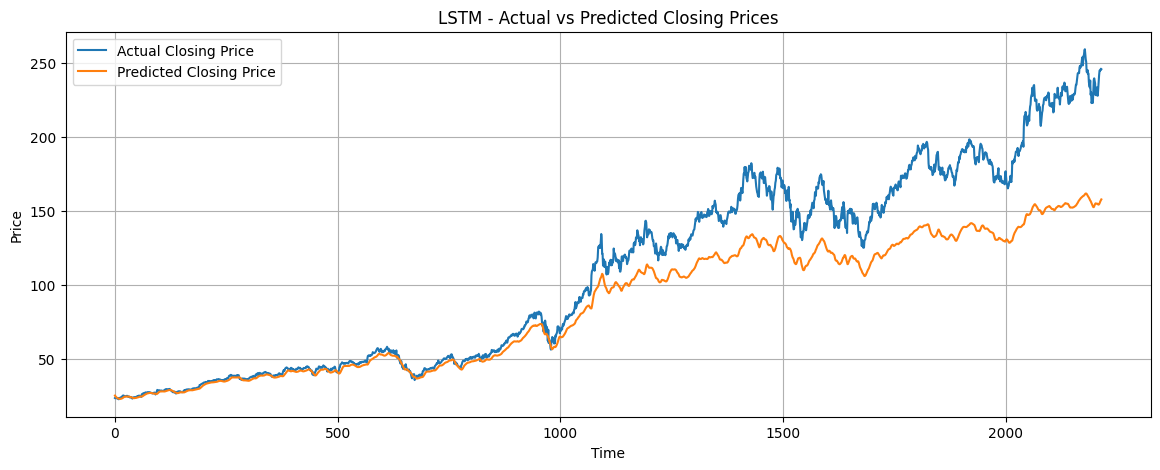

In [17]:
#Unscale the predictions
predicted_unscaled = s.inverse_transform(predicted)
y_test_unscaled = s.inverse_transform(y_test.reshape(-1, 1))
#Plot
plt.figure(figsize=(14,5))
plt.plot(y_test_unscaled, label='Actual Closing Price')
plt.plot(predicted_unscaled, label='Predicted Closing Price')
plt.title('LSTM - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''LSTM's actually did bad in this example,more and more overfitting'''